In [ ]:
%matplotlib inline

# **Tutorial for fusion along detection**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Ya6kezCLMHiWM58MefbcqpNNXFvk3Noc?usp=sharing)

This tutorial shows how to apply Leonardo-FUSE to integrate light-sheet datasets with dual-sided illumination and dual-sided detection together.


The data used here is available in [zenodo](https://). We use volumes "I0_D1_crop.tiff", "I1_D1_crop.tiff", "I0_D0_crop.tiff" and "I1_D0_crop.tiff" for this tutorial. Here, "I0" and "I1" mean two opposite illumination lenses, while "D0" and "D1" means two opposing detection lenses. Datasets are well-aligned in advance.

## **Import packages & data**

In [ ]:
# in case Leonardo-FUSE is not installed yet
!git clone https://github.com/peng-lab/LSFM-fusion.git
!pip install ./LSFM-fusion

In [ ]:
from FUSE import FUSE_det

In [ ]:
# load datasets
import tifffile
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)

X_I0_D1 = tifffile.imread("/content/drive/MyDrive/LSFM/Multi-View-Reconstruction/zenodo/I0_D1_crop.tiff")
X_I1_D1 = tifffile.imread("/content/drive/MyDrive/LSFM/Multi-View-Reconstruction/zenodo/I1_D1_crop.tiff")
X_I0_D0 = tifffile.imread("/content/drive/MyDrive/LSFM/Multi-View-Reconstruction/zenodo/I0_D0_crop.tiff")
X_I1_D0 = tifffile.imread("/content/drive/MyDrive/LSFM/Multi-View-Reconstruction/zenodo/I1_D0_crop.tiff")

Mounted at /content/drive/


## **Start fusion**

First, let's visualize the maximum intensity projection of the four datasets to figure out the orientation of the system:

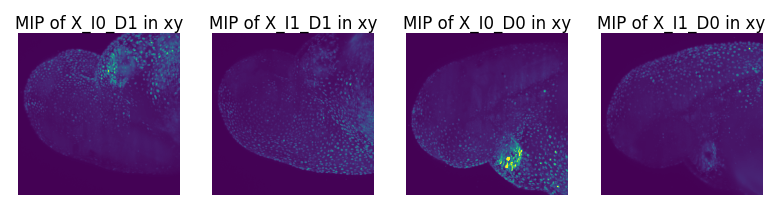

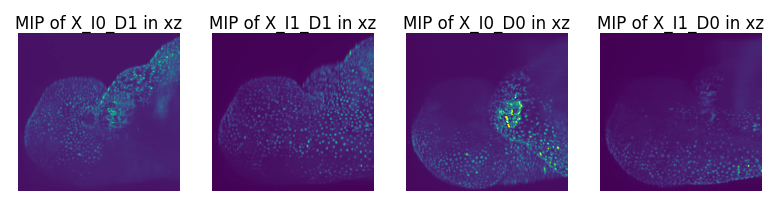

In [ ]:
import matplotlib.pyplot as plt
import scipy

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, dpi=150)
ax1.imshow(X_I0_D1.max(0), vmax = 2500)
ax1.set_title("MIP of X_I0_D1 in xy", fontsize=8, pad=1)
ax1.axis("off")
ax2.imshow(X_I1_D1.max(0), vmax = 2500)
ax2.set_title("MIP of X_I1_D1 in xy", fontsize=8, pad=1)
ax2.axis("off")
ax3.imshow(X_I0_D0.max(0), vmax = 2500)
ax3.set_title("MIP of X_I0_D0 in xy", fontsize=8, pad=1)
ax3.axis("off")
ax4.imshow(X_I1_D0.max(0), vmax = 2500)
ax4.set_title("MIP of X_I1_D0 in xy", fontsize=8, pad=1)
ax4.axis("off")
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, dpi=150)
ax1.imshow(scipy.ndimage.zoom(X_I0_D1.max(1), (2.5, 0.65)), vmax = 2500)
ax1.set_title("MIP of X_I0_D1 in xz", fontsize=8, pad=1)
ax1.axis("off")
ax2.imshow(scipy.ndimage.zoom(X_I1_D1.max(1), (2.5, 0.65)), vmax = 2500)
ax2.set_title("MIP of X_I1_D1 in xz", fontsize=8, pad=1)
ax2.axis("off")
ax3.imshow(scipy.ndimage.zoom(X_I0_D0.max(1), (2.5, 0.65)), vmax = 2500)
ax3.set_title("MIP of X_I0_D0 in xz", fontsize=8, pad=1)
ax3.axis("off")
ax4.imshow(scipy.ndimage.zoom(X_I1_D0.max(1), (2.5, 0.65)), vmax = 2500)
ax4.set_title("MIP of X_I1_D0 in xz", fontsize=8, pad=1)
ax4.axis("off")
plt.show()

We can observe that:

*   the four datasets stand for:
    *   X_I0_D1: illuminated from the top (in the image space)  + recorded using ventral camera;
    *   X_I1_D1: illuminated from the bottom (in the image space) + recorded using ventral camera;
    *   X_I0_D0: illuminated from the bottom (in the image space) + recorded using dorsal camera;
    *   X_I1_D0: illuminated from the top (in the image space) + recorded using dorsal camera;
*   two datasets recorded using dorsal camera, i.e., "D0", need to be flipped vertically to be mapped into the same space as datasets recorded via ventral camera.
<br/>
<br/>
Next, we can initialize a `FUSE_det` object. Here, we initilize FUSE_det using default parameters. A more advanced list of available arguments can be found in section [API reference](https://leonardo-lsfm.readthedocs.io/en/latest/api.html)





In [ ]:
model = FUSE_det()

Finally, we start fusion by calling `train` function. Four datasets are feded as `top_illu_ventral_det_data`, `bottom_illu_ventral_det_data`, `top_illu_dorsal_det_data` and `bottom_illu_dorsal_det_data`, respectively, corresponding to their illumination orientation and camera position. Since the datasets are well aligned alread, registration is not needed. Additionally, since we observed flipping vertically in the image space is required for stacks with dorsal camera in advance, `require_flipping_along_illu_for_dorsaldet` need to be True. The fusion result, together with a few intermidiate results, will be saved in folder `save_folder` under path `save_path`.

Cannot skip dual-illu fusion for ventral det...
Cannot skip dual-illu fusion for dorsal det...

Fusion along illumination for ventral camera...
Read in...

Localize sample...
           startX   endX startY    endY         maxv
top             0    992      0    1024  3454.000244
bottom          0    997      0    1024  2523.999512
in summary    0.0  997.0    0.0  1024.0  3454.000244


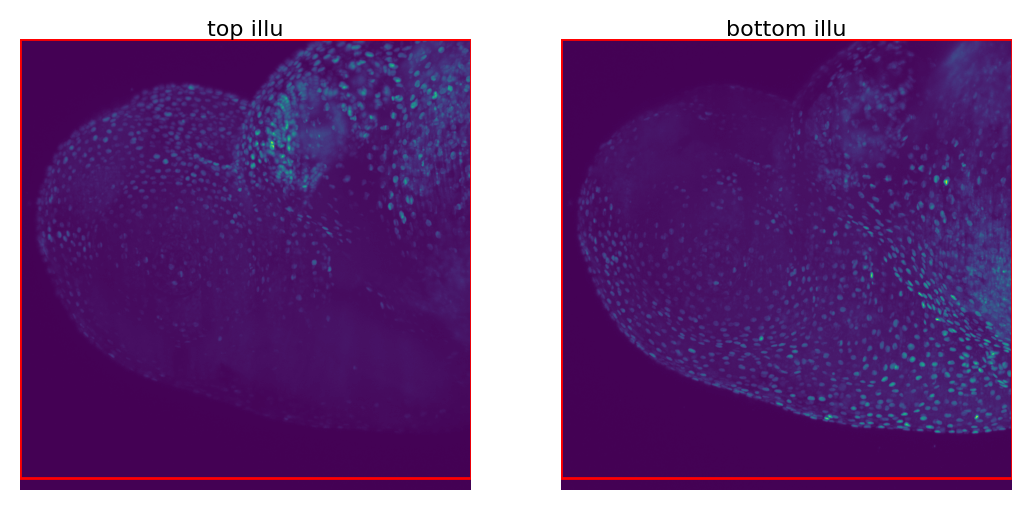


Calculate volumetric measurements...
top/left view: minimum intensity = 65.0, maximum intensity = 2973.0, OTSU threshold = 149.0
bottom/right view: minimum intensity = 63.0, maximum intensity = 2108.0, OTSU threshold = 145.0

Extract features...


NSCT: 100%|██████████| 26/26 [00:57<00:00,  2.20s/it]



Segment sample...


refine along z: 100%|██████████| 2600/2600 [00:02<00:00, 1228.34it/s]



Dual-illumination fusion...
to GPU...
No.049 iteration EM: maximum changes = 1.0
Stitching...


fusion: 100%|██████████| 260/260 [00:10<00:00, 24.21it/s]


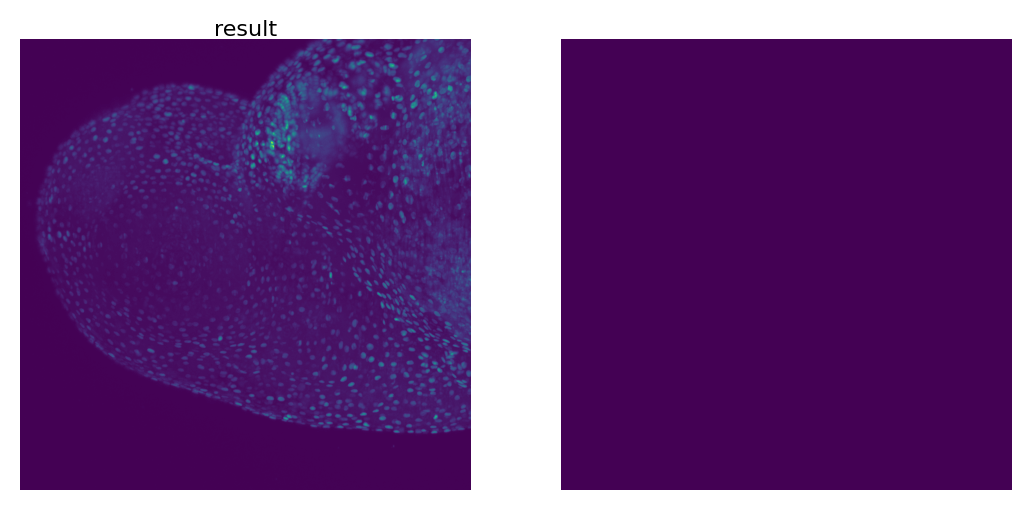

Save...

Fusion along illumination for dorsal camera...
Read in...

Localize sample...
           startX    endX startY    endY         maxv
top             0    1024      0    1024  3473.999756
bottom          0    1024      0    1024  5689.999023
in summary    0.0  1024.0    0.0  1024.0  5689.999023


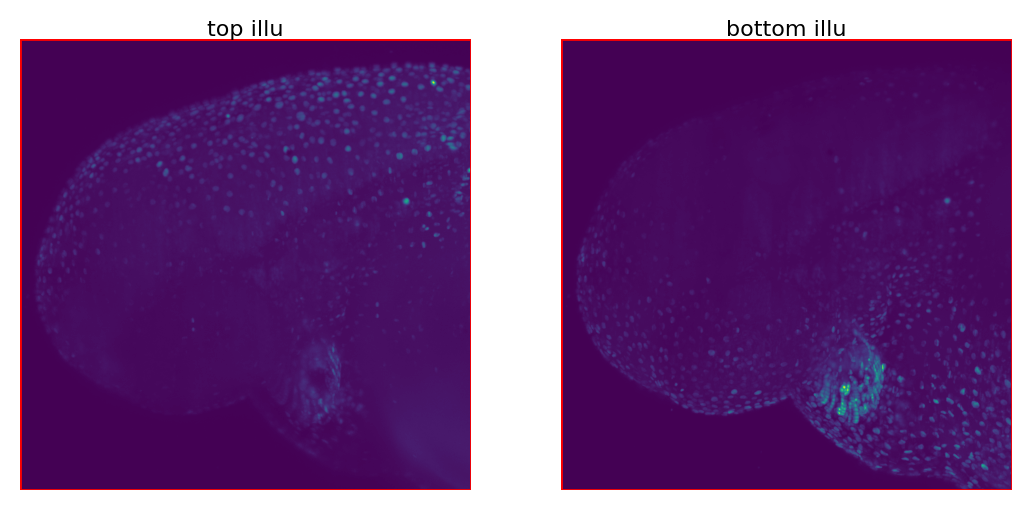


Calculate volumetric measurements...
top/left view: minimum intensity = 67.0, maximum intensity = 2239.0, OTSU threshold = 148.0
bottom/right view: minimum intensity = 66.0, maximum intensity = 3518.0, OTSU threshold = 152.0

Extract features...


NSCT: 100%|██████████| 26/26 [00:55<00:00,  2.15s/it]



Segment sample...


refine along z: 100%|██████████| 2704/2704 [00:03<00:00, 767.36it/s]



Dual-illumination fusion...
to GPU...
No.049 iteration EM: maximum changes = 1.0
Stitching...


fusion: 100%|██████████| 260/260 [00:10<00:00, 24.32it/s]


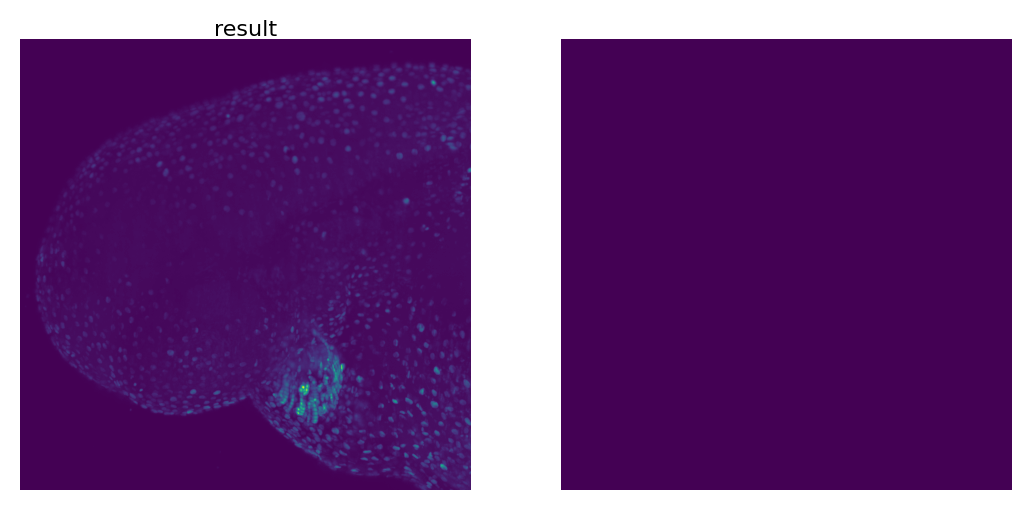

Save...

Localize sample...
read in...
           startX    endX startY    endY         maxv
ventral         0     997      0    1024  2523.999512
dorsal          0    1024      0    1024  5689.999023
in summary    0.0  1024.0    0.0  1024.0  5689.999023


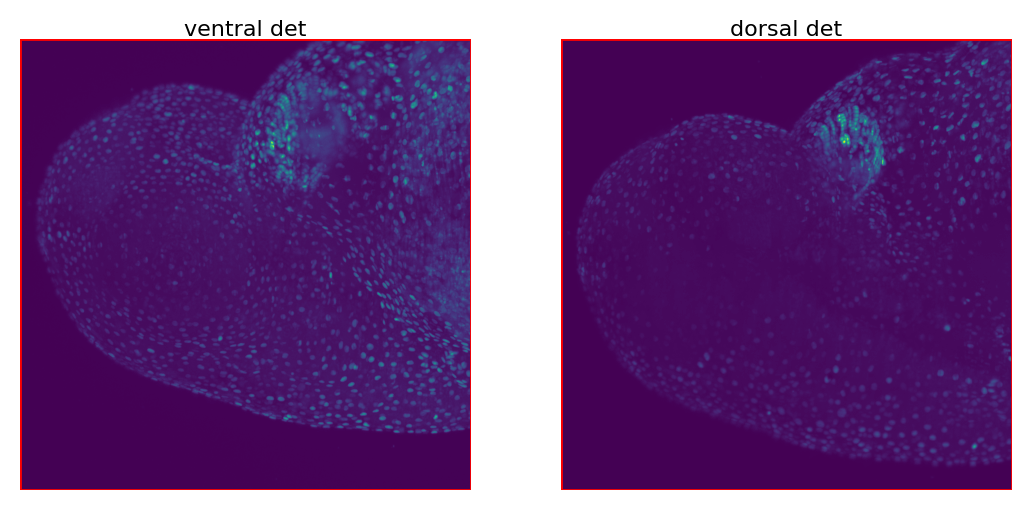

watershed: 100%|██████████| 260/260 [00:07<00:00, 32.51it/s]



For top/left Illu...
read in...


NSCT: 100%|██████████| 26/26 [00:57<00:00,  2.23s/it]


to GPU...
No.049 iteration EM: maximum changes = 1.0

For bottom/right Illu...
read in...


NSCT: 100%|██████████| 26/26 [00:57<00:00,  2.22s/it]


to GPU...
No.049 iteration EM: maximum changes = 1.0

Stitching...
read in...


fusion: 100%|██████████| 260/260 [00:17<00:00, 14.46it/s]


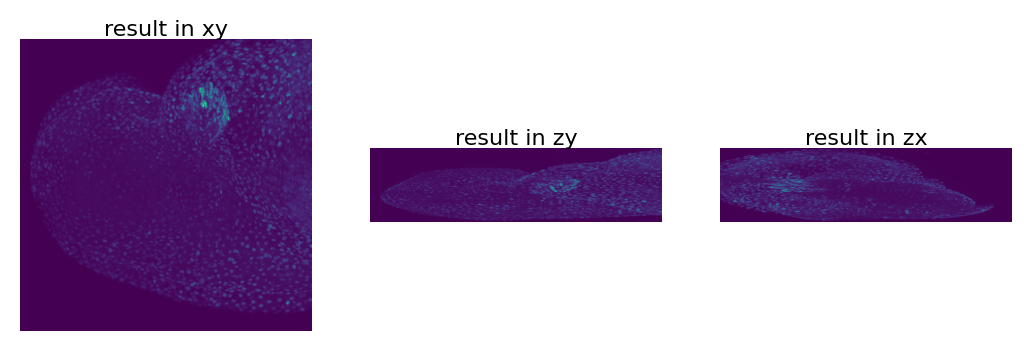

Save...


In [ ]:
# start fusion
save_path = "./"
save_folder = "fuse_det_result"

recon = model.train(require_registration = False,
                    require_flipping_along_illu_for_dorsaldet = True,
                    require_flipping_along_det_for_dorsaldet = False,
                    top_illu_ventral_det_data = X_I0_D1,
                    bottom_illu_ventral_det_data = X_I1_D1,
                    top_illu_dorsal_det_data = X_I1_D0,
                    bottom_illu_dorsal_det_data = X_I0_D0,
                    save_path = save_path,
                    save_folder = save_folder,
                    )

In [15]:
tifffile.imwrite("/content/drive/MyDrive/LSFM/Multi-View-Reconstruction/zenodo/quadrupleFusionResult.tif", recon)

## **Note 1**

In reality, to facilitate batch processing, users can also feed in data-to-be-fused without reading them into the memory. To do so, please save the data-to-be-fused in such structure:
```
    data_path
        ├─ sample_name
                    ├─ X_I0_D1.tiff
                    ├─ X_I1_D1.tiff
                    ├─ X_I1_D0.tiff
                    ├─ X_I0_D0.tiff
```
and call the `train` function as follows:

```
recon = model.train(data_path = data_path,
                    sample_name = sampel_name,
                    require_registration = False,
                    require_flipping_along_illu_for_dorsaldet = True,
                    require_flipping_along_det_for_dorsaldet = False,
                    top_illu_ventral_det_data = "X_I0_D1.tiff",
                    bottom_illu_ventral_det_data = "X_I1_D1.tiff",
                    top_illu_dorsal_det_data = "X_I1_D0.tiff",
                    bottom_illu_dorsal_det_data = "X_I0_D0.tiff",
                    save_path = save_path,
                    save_folder = save_folder,
                    )
```



## **Note 2**

Depends on the system, the illumination orientation in then image space can also from left or right. In this way, input datasets should be called by `left_illu_ventral_det_data`, `right_illu_ventral_det_data`, `left_illu_dorsal_det_data` and `right_illu_dorsal_det_data`:
```
recon = model.train(require_registration = False,
                    require_flipping_along_illu_for_dorsaldet = True,
                    require_flipping_along_det_for_dorsaldet = False,
                    left_illu_ventral_det_data = X_I0_D1,  # suppose X_I0_D1 is illuminated from the left
                    right_illu_ventral_det_data = X_I1_D1, # suppose X_I1_D1 is illuminated from the right
                    left_illu_dorsal_det_data = X_I1_D0, # suppose X_I1_D0 is illuminated from the left
                    right_illu_dorsal_det_data = X_I0_D0, # suppose X_I0_D0 is illuminated from the right
                    save_path = save_path,
                    save_folder = save_folder,
                    )
```

## **Note 3**

In reality, the dorsal camera can be mimicked by rotating the specimen 180 degree, which eases sample mounting. Nevertheless, it requires the registration of the volumes imaged after rotation to those captured before rotation. In princple, we recommend that users of Leonardo-FUSE manually register the input stacks before-hand. Still, we offer automatic registration in `FUSE_det`, which can be enabled as following:
```
recon = model.train(require_registration = True,
                    require_flipping_along_det_for_dorsaldet = True,
                    z_spacing = ...,
                    xy_spacing = ...,
                    ...
                    )
```

where `require_flipping_along_det_for_dorsaldet` is used in case the two datasets recorded after rotation is flipped along *z*, `z_spacing` and `xy_spacing` are axial and lateral resolution to be used for registration.

## **Note 4**

Sometimes, in some special light-sheet based systems, for example [Balze](https://www.miltenyibiotec.com/DE-en/products/ultramicroscope-blaze.html), the dual-sided illumination is fused on-the-fly. Thus, FUSE_det is only to fuse two datasets with opposing detecting orientations:
```
recon = model.train(ventral_det_data = ventral_det_data,
                    dorsal_det_data = dorsal_det_data,
                    left_right = True,
                    ...
                    )
```
where `ventral_det_data` and `dorsal_det_data` are arguments for input datsets recorded using ventral camera or dorsal camera, respectively (could also be before/after rotation). `left_right` is a boolean arguments to say whether, in the image space, the illumination orientation is from left and right, or top and bottom.

## **Note 5**

Since light-sheet microscopy is especially helpful to image extremely large specimen, Leonardo offers solution to fuse extremely huge datasets. The key idea is to train the fusion algorithm in a downsampled space, and then apply it to the datasets with full resolution:
```
recon_lr = model.train(save_path = save_path,
                       save_folder = save_folder,
                       )

model.apply(require_registration = ...,
            ventral_det_data_path = "volume name of ventral_det_data_in_full_resolution",
            dorsal_det_data_path = "volume name of dorsal_det_data_in_full_resolution",
            boundary_path = os.path.join(save_path, save_folder, "ventral_det", "fusionBoundary_z.tif"),
            translating_information = os.path.join(save_path, save_folder, "ventral_det", "translating_information.npy"),
            z_spacing = ...,
            xy_spacing = ...,
            z_upsample_ratio = ...,  # the upsampling ratio along z to the low-resolution volume used for model.train()
            xy_upsample_ratio = ..., # the upsampling ratio along xy to the low-resolution volume used for model.train()
            )
```